## Deskripsi
Dataset berasal dari <a href='https://www.kaggle.com/datasets/jboysen/london-crime'>Kagel</a>

### Konteks
Kumpulan data ini merupakan catatan kejahatan di wilayah metropolitan utama, seperti London, terjadi dalam pola yang berbeda. Data ini mencakup jumlah laporan kriminal berdasarkan bulan, wilayah LSOA, dan kategori mayor/minor dari Jan 2008-Des 2016.

- lsoa_code: code for Lower Super Output Area in Greater London.
- borough: Common name for London borough.
- major_category: High level categorization of crime
- minor_category: Low level categorization of crime within major category.
- value: monthly reported count of categorical crime in given borough
- year: Year of reported counts, 2008-2016
- month: Month of reported counts, 1-12


In [264]:
# Import Library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import folium

%matplotlib inline


In [265]:
# load dataset
df = pd.read_csv('./dataset/london_crime_by_lsoa.csv')

#Baca 5 data teratas
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [266]:
# cek data shape
df.shape

(13490604, 7)

Data memiliki 13490604 kejadian dan 7 kolom

In [267]:
#cek info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Pada data tersebut, terdapat 3 kolom bertipe integer dan 4 kolom bertipe object. Pada data tersebut juga tidak terdapat data null, namun untuk memastikan kembali, akan dilakukan pengecekan data null kembali

In [268]:
#cek data nul
df.isnull().any()

lsoa_code         False
borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool

Pada data tersebut, tidak terdapat data null

## Area Plot

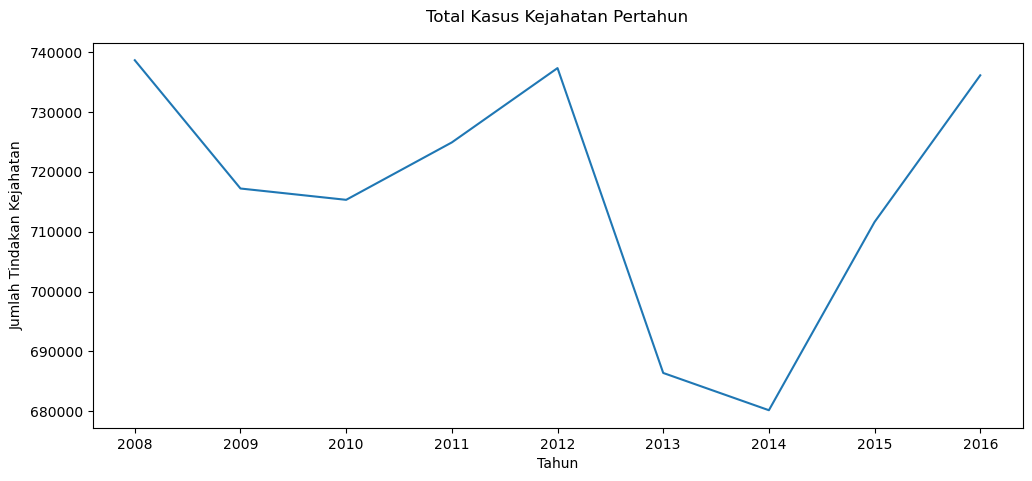

In [269]:
# Mengambil jumlah total case pertahun
total_case_year = df.groupby('year')['value'].sum()

total_case_year.plot(kind='line', figsize=(12, 5)) 

plt.title('Total Kasus Kejahatan Pertahun', pad=15)
plt.ylabel('Jumlah Tindakan Kejahatan') 
plt.xlabel('Tahun') 
plt.show()

Pada area plot tersebut, tindak kejahatan pada tahun 2012 - 2013 mengalami penurunan yang sangat dratis. Namun pada tahun terakhir yaitu tahun 2014 - 2016, tindak kejahatan mengalami peningkatan yang sangat significant

## Histogram 

In [270]:
# Mengambil total case berdasrkan borough
df_by_borough = df.groupby(['borough'])['value'].sum()


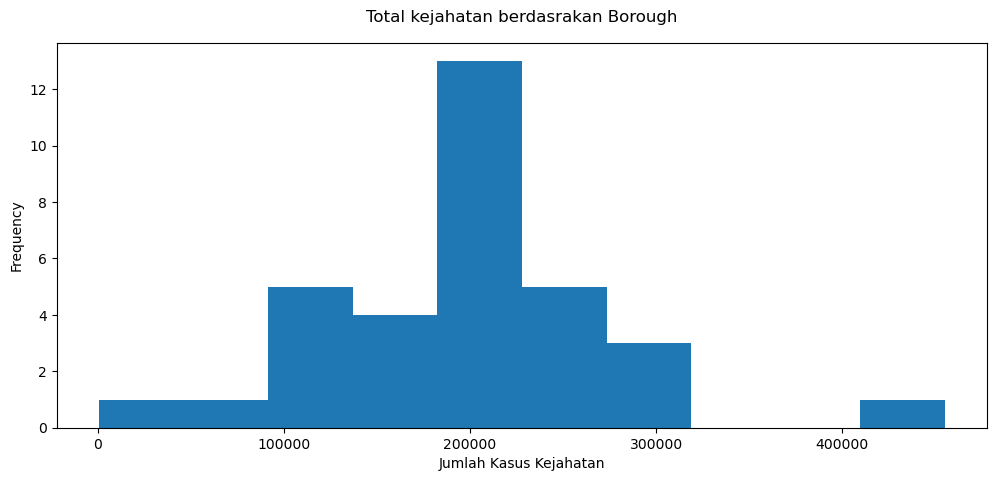

In [271]:
# Membuat plot histogram
df_by_borough.plot(kind='hist', figsize=(12, 5))

plt.title('Total kejahatan berdasrakan Borough', pad=15)
plt.xlabel('Jumlah Kasus Kejahatan')
plt.ylabel('Frequency')
plt.show()

Berdasarkan histom tersebut, terdapat 13 borough yang memeiliki total kasus kejahatan kurang lebih 200000 kejatahan, dan terdapat 1 borough yang memiliki jumlah kasus sebanyak

## Bar Chart

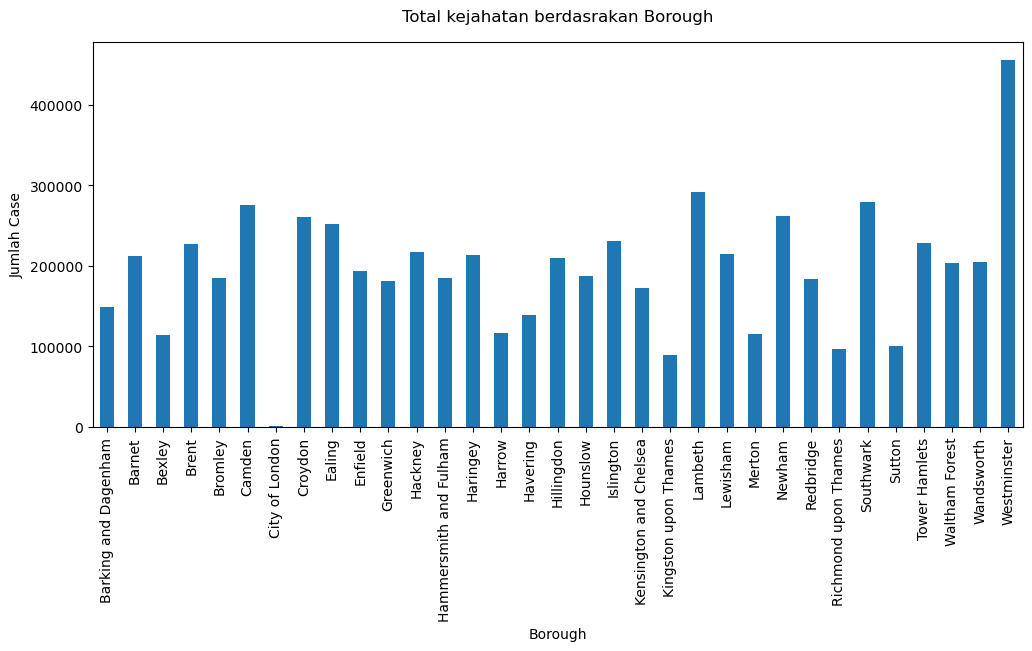

In [272]:
# Membuat plot bar chart berdasarakan borough
df_by_borough.plot(kind='bar', figsize=(12, 5))

plt.title('Total kejahatan berdasrakan Borough', pad=15)
plt.xlabel('Borough')
plt.ylabel('Jumlah Case')
plt.show()

Pada bar chart tersebut, Westminster merupakan borough yang memiliki jumlah kasus kejahatan terbanyak. City of London merupakan borough yang memeiliki jumlah kasus paling sedikit

## Pie Chart

In [273]:
# Mengambil jumlah kejahtan berdasarkan mahjor category
df_by_major = df.groupby(['major_category'])['value'].sum()

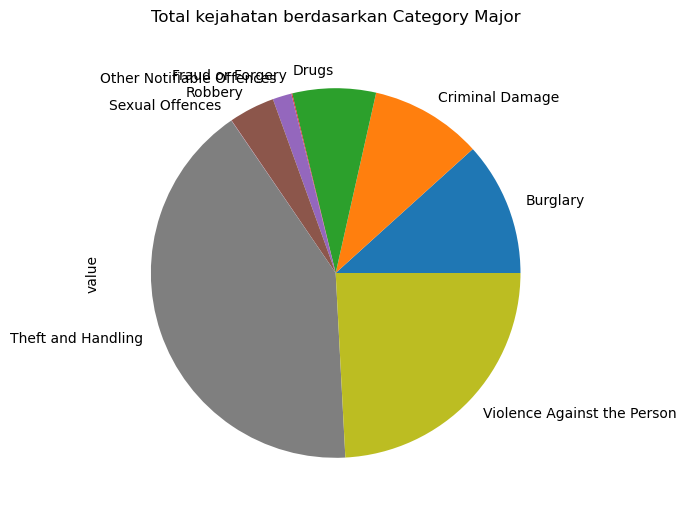

In [274]:
# Membuat plot pie chart berdasarkan major category
df_by_major.plot(kind='pie', figsize=(12, 6))

plt.title('Total kejahatan berdasarkan Category Major', pad=15)
plt.show()

Pada pie chart tersebut, terlihat bahwa Theft and Handling merupakan Major Category dengan jumlah kasus terbanyak, yang kemudian di susul oleh Violencce Against the Person

## Box Plot

In [275]:
# Mengelompokan data berdasarkan borough dan year
df_by_borough_year = df.groupby(['borough', 'year'])['value'].sum()

In [276]:
# Membuat data frame baru
df_borough = pd.DataFrame(df_by_borough_year)

In [277]:
df_borough.head()

value
borough              year       
Barking and Dagenham 2008  17656
                     2009  17713
                     2010  17130
                     2011  16686
                     2012  15990

In [278]:
# Reset index dataframe
df_borough.reset_index(inplace=True)

In [279]:
# Set index berdasarkan borough
df_borough.set_index(keys='borough', inplace=True)

In [280]:
df_borough.head()

,year,value
borough,,
Barking and Dagenham,2008,17656
Barking and Dagenham,2009,17713
Barking and Dagenham,2010,17130
Barking and Dagenham,2011,16686
Barking and Dagenham,2012,15990


In [281]:
# Ambil data Lambeth untuk dijadikan dataframe terlebih dahulu
df_top_4 = df_borough.loc[['Lambeth']]

In [282]:
# Reset index
df_top_4.reset_index(inplace=True)

In [283]:
# Drop colomns borough
df_top_4.drop(columns='borough', inplace=True)

In [284]:
# Rename colomns value menjadi Lambeth
df_top_4.rename(columns= {'value' : 'Lambeth'}, inplace=True)

In [285]:
df_top_4.head()

,year,Lambeth
0,2008,31717
1,2009,31225
2,2010,31671
3,2011,33224
4,2012,33473


In [286]:
# ambil data 'Lambeth', 'Southwark', 'Camden', 'Newham'
southwark = df_borough.loc[['Southwark'], 'value']
camden = df_borough.loc[['Camden'], 'value']
newham = df_borough.loc[['Newham'], 'value']

In [287]:
# Masukan ke dataframe top 5
df_top_4['Southwark'] = southwark.to_numpy()
df_top_4['Camden'] = camden.to_numpy()
df_top_4['Newham'] = newham.to_numpy()

In [288]:
# Set index menjadi year
df_top_4.set_index(keys='year', inplace=True)

In [289]:
df_top_4.head()

,Lambeth,Southwark,Camden,Newham
year,,,,
2008,31717,33470,32010,29752
2009,31225,30623,31612,28610
2010,31671,31320,31804,30728
2011,33224,30723,33956,27978
2012,33473,30737,31472,30067


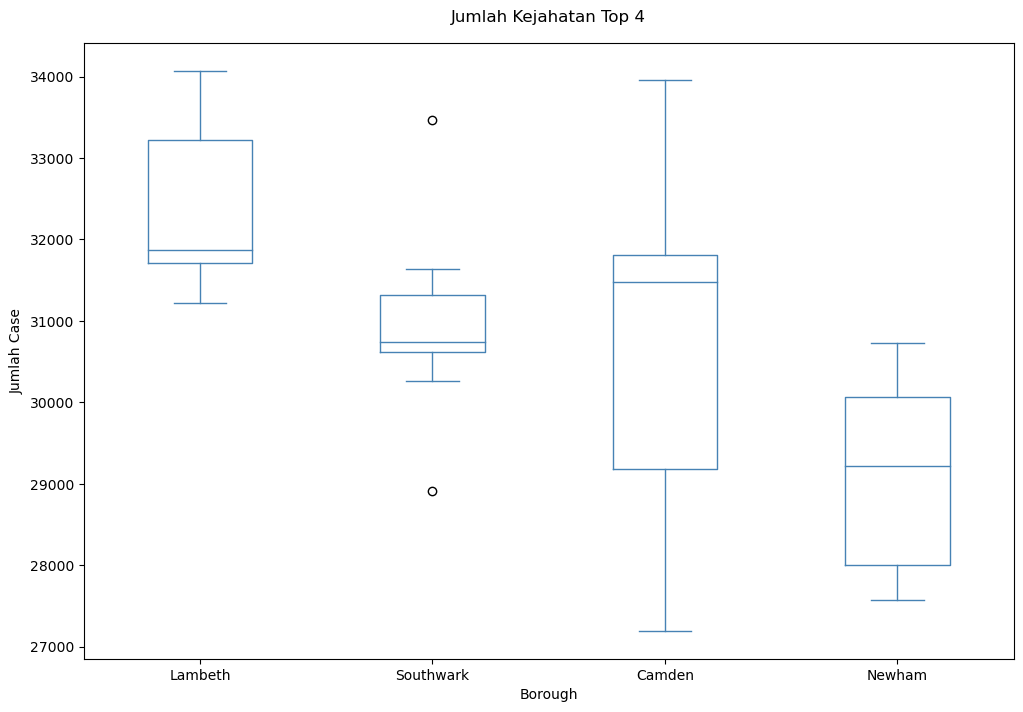

In [290]:
# Tampilkan dalam box plot
df_top_4.plot(kind='box', figsize=(12, 8), color='steelblue')
plt.title('Jumlah Kejahatan Top 4', pad=15)
plt.xlabel('Borough')
plt.ylabel('Jumlah Case')
plt.show()

Pada top 4 jumlah kejahatan berdasarkan Borough, Southwark merupakan Borough yang memiliki outlier. Tren dari masing - masing Borough memiliki tren yang berbeda - beda

## Scatter Plot

In [291]:
# Membuat dataframe baru yang didapatkan dari dataframe yang dikelompokan berdasarkan borough dan year
df_tot = pd.DataFrame(df_by_borough_year)

In [292]:
df_tot.head()

value
borough              year       
Barking and Dagenham 2008  17656
                     2009  17713
                     2010  17130
                     2011  16686
                     2012  15990

In [293]:
# Mereset index dari df_tot
df_tot.reset_index(inplace=True)

In [294]:
df_tot.head()

,borough,year,value
0,Barking and Dagenham,2008,17656
1,Barking and Dagenham,2009,17713
2,Barking and Dagenham,2010,17130
3,Barking and Dagenham,2011,16686
4,Barking and Dagenham,2012,15990


In [295]:
# Melakuakan set index berdasarkan borough
df_tot.set_index(keys='borough', inplace=True)

In [296]:
df_tot.head()

,year,value
borough,,
Barking and Dagenham,2008,17656
Barking and Dagenham,2009,17713
Barking and Dagenham,2010,17130
Barking and Dagenham,2011,16686
Barking and Dagenham,2012,15990


In [297]:
# Mengambil data berdasarkan index 'Westminster' ,'Lambeth', 'Southwark', 'Camden', 'Newham', 'Croydon', 'Ealing', 'Islington', 'Tower Hamlets', 'Brent'
df_plot_borough = df_tot.loc[['Westminster' ,'Lambeth', 'Southwark', 'Camden', 'Newham', 'Croydon', 'Ealing', 'Islington', 'Tower Hamlets', 'Brent']]

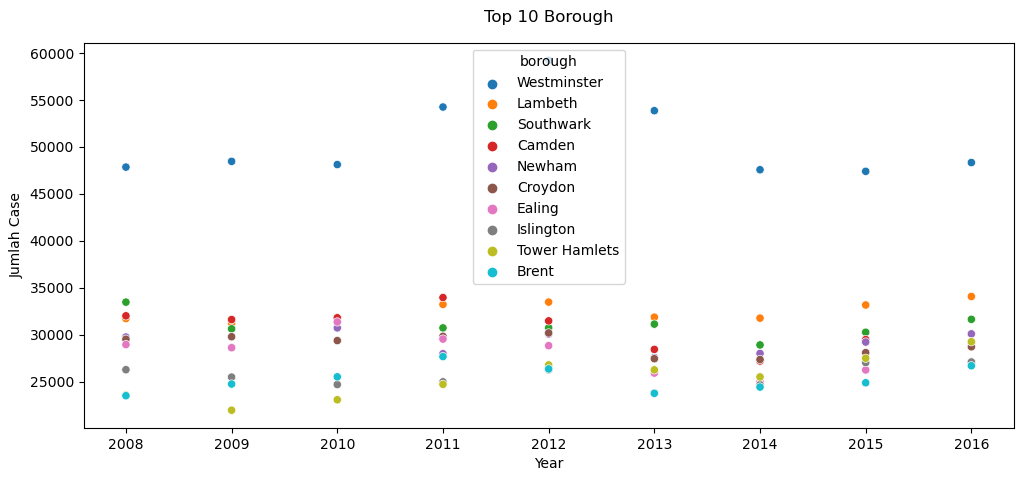

In [298]:
plt.figure(figsize=(12, 5)) # Mengatur ukuran gambar

# Membuat scatterplot dengan seaborn
sns.scatterplot(data=df_plot_borough, x='year', y='value', hue='borough')
plt.title('Top 10 Borough', pad=15)
plt.xlabel('Year')
plt.ylabel('Jumlah Case')
plt.show()

Pada scatter plot tersebut, Westminter merupakan borough yang setiap tahunnya memiliki kasusu kejahatan paling terbanyak dibandingkan dengan borough yang lainnya. Pada top 9 borough lainnya, jumlah kasus kejahatan memiliki pola yang hampir sama pada setiap tahunnya

## Word Clouds

In [299]:
# Mengambil kasus dengan value lebih dari 0
case_lebih_0 = df[df['value'] > 0]
case_lebih_0.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4


In [300]:
# Menampung text borough untuk di jaikan wordcloud
borough_string = ''

# melakuka iterasi pada borough
for bor in case_lebih_0['borough'].unique():
    # Mengatur jumlah borough yang akan di ambil, dengan menghitung borough dana membaginya 
    # dengan 90000 agar data tidak teralalu besar
    jumlah_borough = df['borough'][df['borough'] == bor].count() // 90000
    borough_string = borough_string + ((bor + ' ') * jumlah_borough) 

In [301]:
# melakuakn generate wordcloud
wordcloud = WordCloud(background_color='white').generate(borough_string)

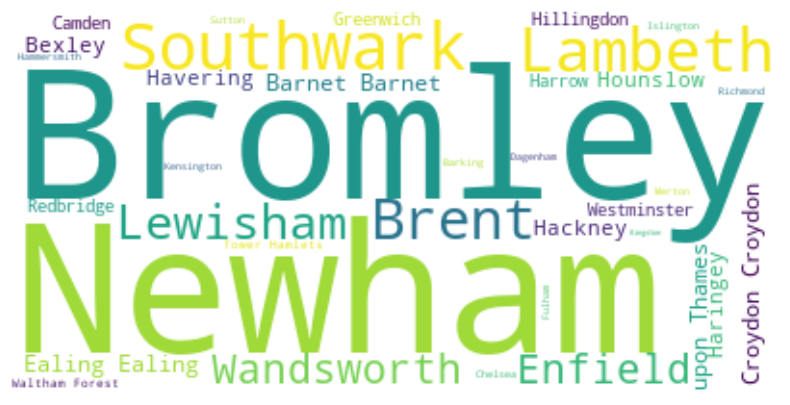

In [302]:
# menampilkan hasil cloud
plt.figure(figsize=(12, 5))
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off') 
plt.show()

## Folium Maps

In [303]:
df_folium_maps = df[['borough', 'value']]

In [304]:
world_map = folium.Map(location=[51.5074, 0.1278], zoom_start=10)

In [305]:
world_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson' 

In [306]:
world_map.choropleth( 
                    geo_data=world_geo,
                    data=df_folium_maps, 
                     columns=['borough', 'value'], 
                     key_on='feature.properties.name', 
                     fill_color='YlOrRd',
                     fill_opacity=0.7, 
                     line_opacity=0.2, 
                     legend_name='Total Kejahatan' ) 
# display map 
world_map

d:\projek-kmi\PYTN_Assgn_1_4_Ardi Yuliantoro\.pytn1\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


## Kesimpulan

1. Jumlah Kekerasan Terhadap Orang meningkat dalam beberapa tahun terakhir.
2. Terdapat 12 lebih Borough yang memiliki jumlah kasus kejahatan 200000
3. Westminster merupakan borough yang memiliki jumlah kasus kejahatan terbanyak.
4. City of London merupakan borough yang memeiliki jumlah kasus paling sedikit. 
5. Theft and Handling merupakan Major Category dengan jumlah kasus terbanyak